# Submission by:
    Name: Sarthak Punjabi
    Student Number: 21183147
    Module Name: CS4168 Data Mining
    Lab Number: 1
    
    

# `Task 3`


# Lab 1: Exploratory Data Analysis of Bank Marketing Dataset.
EDA (Exploratory Data Analysis) is an approach or philosophy for data analysis that employs a variety of techniques usually graphical.

Often simple graphical techniques are used:
1. Plotting the raw data.
2. Plotting simple statistics.
3. Positioning plots to maximize pattern-recognition abilities. 
# Information of the Dataset
For this exercise we are using Bank Marketing Dataset. The dataset is related to the marketing campaigns based on phone calls of a Portuguese banking institution.

## *`Importing the libraries`*

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Loading Dataset`

In [96]:
data = pd.read_csv("../datasets/bank.csv")


##### Description - The dataset contains data from a financial institution's marketing effort.

## *`Understanding the data`*
#### For exploration we used head() tail() shape columns methods

In [97]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [98]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [99]:
data.shape

(2000, 17)

In [100]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

From the above we can see that the variable age is missing values. 

1) age (numeric)
2) job : type of job (categorical)
3) marital : marital status (categorical)
4) education (categorical)
5) default: has credit in default (categorical)
6) housing: has housing loan (categorical)
7) loan: has personal loan (categorical)
8) contact: contact communication type (categorical)
9) month: last contact month of year (categorical)
10)  day_of_week: last contact day of the week(categorical)
11)  duration: last contact duration, in seconds (numeric). 
12)  campaign: number of contacts performed during this campaign and for this client (numeric)
13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
14) previous: number of contacts performed before this campaign and for this client (numeric)
15) poutcome: outcome of the previous marketing campaign (categorical)


Output variable (desired target):
21 - y - has the client subscribed a term deposit (binary)

## `Numerical Description of the data`

In [101]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [103]:
data.nunique()

age             68
job             11
marital          3
education        3
default          2
balance       1274
housing          2
loan             2
contact          2
day             31
month           12
duration       655
campaign        11
pdays          363
previous        26
poutcome         3
subscribed       2
dtype: int64

### `checking for the distribution type`

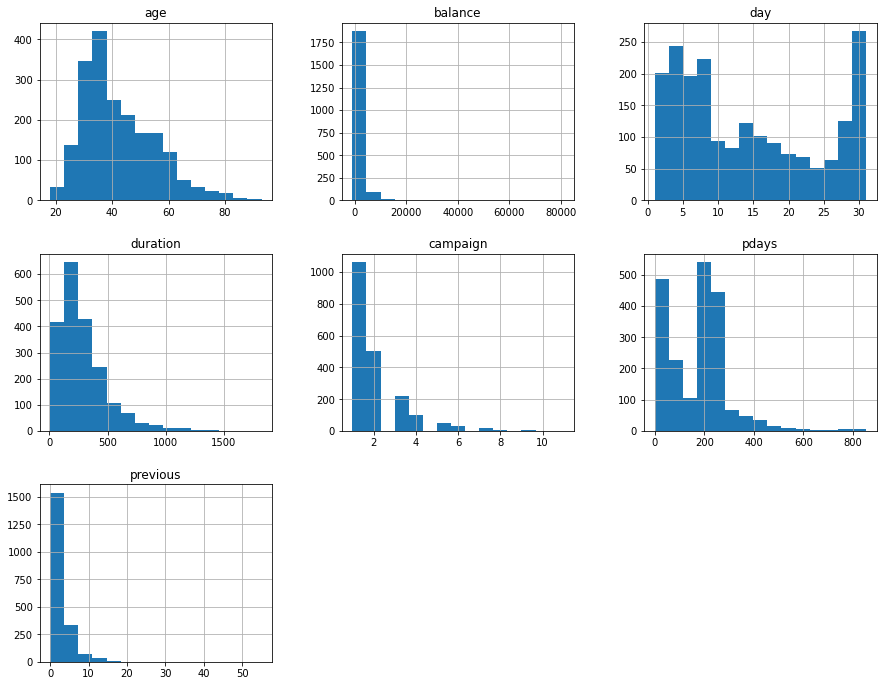

In [104]:
data[data.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));

##### We can see the Distribution is skewed in the most of the columns that can be improved by feature scaling

## `checking for the correlation`

##### ***Correlation for Numerical Variable***

In [105]:
data.corr(method='pearson')


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.139874,0.042411,0.076732,-0.002876,0.009121,0.063805
balance,0.139874,1.000000,0.037078,0.096633,0.025103,-0.033014,0.030292
day,0.042411,0.037078,1.000000,0.058597,-0.019719,0.054188,0.063716
duration,0.076732,0.096633,0.058597,1.000000,-0.005188,-0.095650,-0.015965
campaign,-0.002876,0.025103,-0.019719,-0.005188,1.000000,0.030929,0.140995
pdays,0.009121,-0.033014,0.054188,-0.095650,0.030929,1.000000,0.218636
previous,0.063805,0.030292,0.063716,-0.015965,0.140995,0.218636,1.000000


<AxesSubplot:>

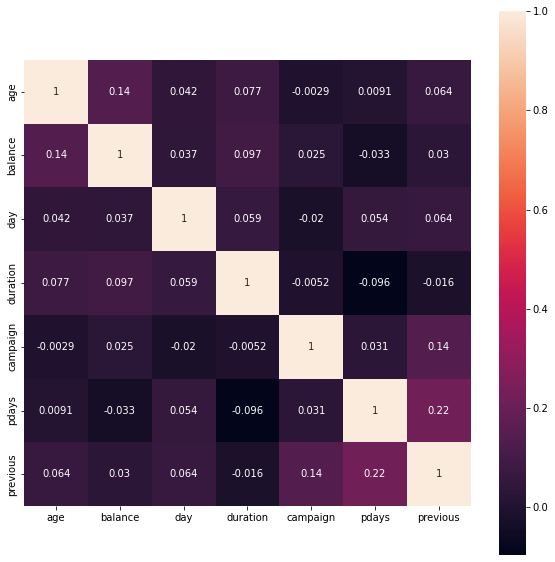

In [106]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True,annot=True)

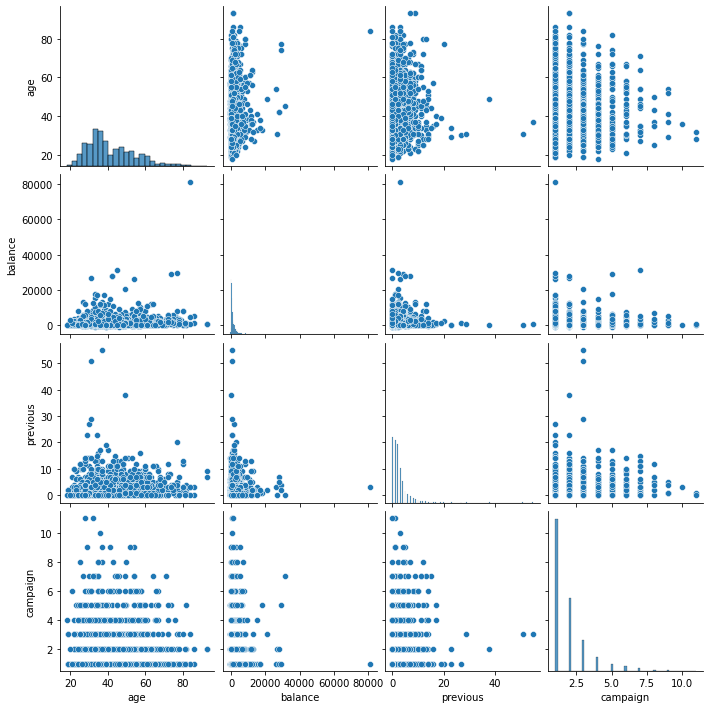

In [107]:
sns.pairplot(data=data[['age','balance','previous','campaign']].dropna())
plt.show()

#### *from the above heatmap and pairplot we can identify that there is correlation between--*

##### 1. Columns - Previous and pdays

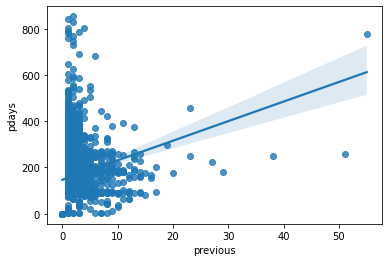

In [108]:
sns.regplot(data=data, x='previous', y='pdays')
plt.show()

#### 2. Columns - balance and age

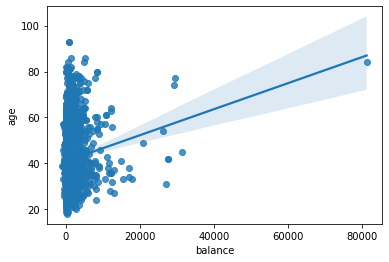

In [109]:
sns.regplot(data=data, x='balance', y='age')
plt.show()

#### 3. Columns previous and campaign

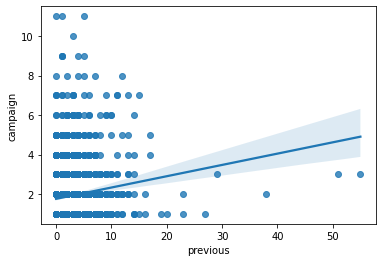

In [110]:
sns.regplot(data=data, x='previous', y='campaign')
plt.show()

#### ***Correlation between categorical variable***

In [111]:
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['subscribed']))]
for cat_feature in categorical_features:
    print(f"{cat_feature}",data[cat_feature].value_counts())

job management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
marital married     1111
single       674
divorced     215
Name: marital, dtype: int64
education secondary    995
tertiary     684
primary      217
Name: education, dtype: int64
default no     1985
yes      15
Name: default, dtype: int64
housing no     1037
yes     963
Name: housing, dtype: int64
loan no     1750
yes     250
Name: loan, dtype: int64
contact cellular     1663
telephone     146
Name: contact, dtype: int64
month feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64
poutcome failure    955
success    444
other      147
Name: poutcome, dtype: int64


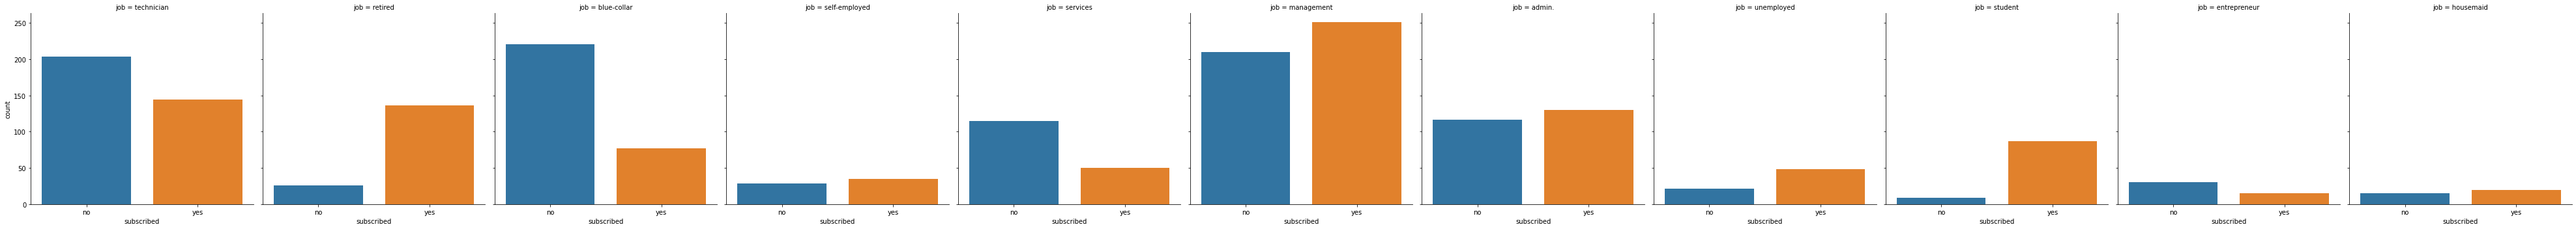

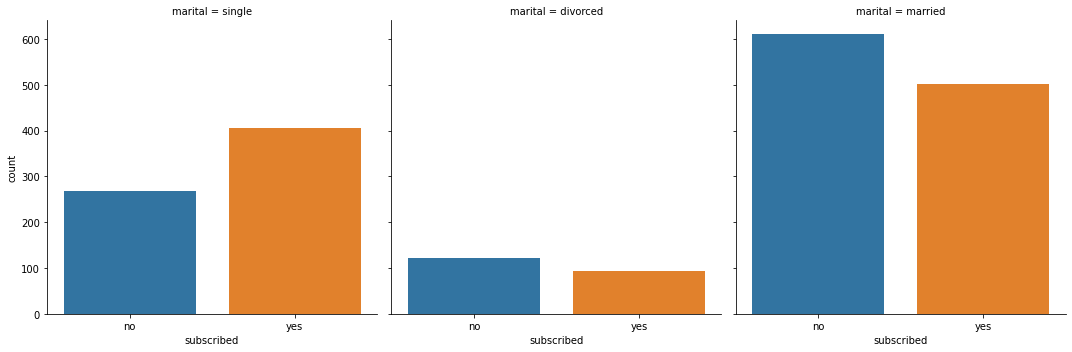

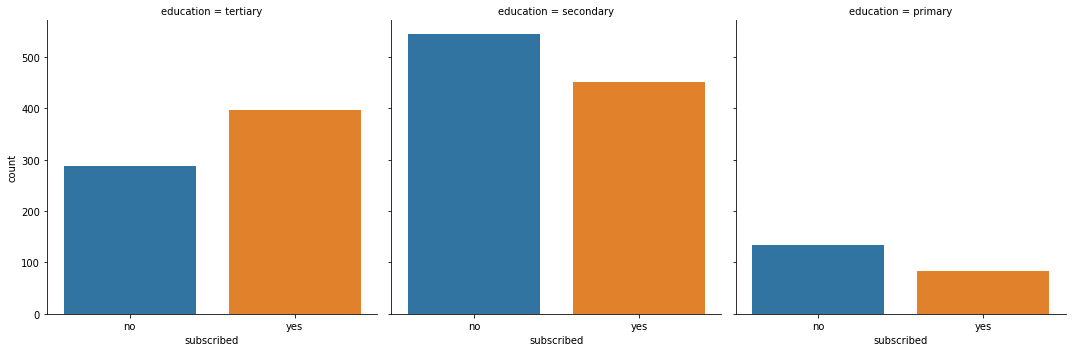

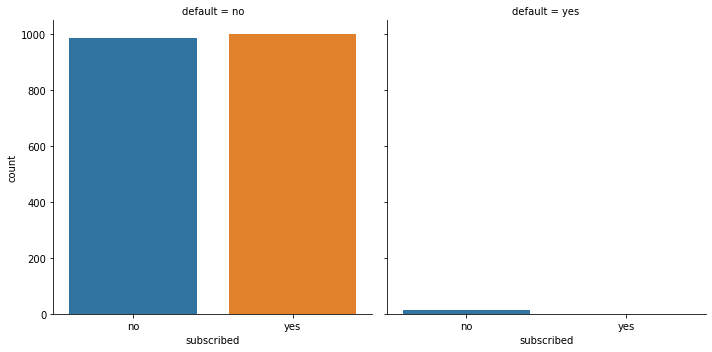

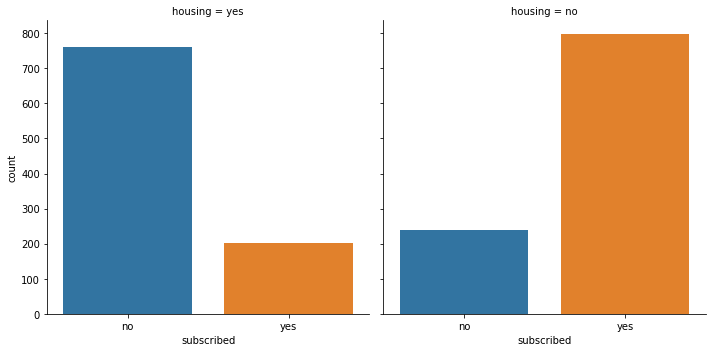

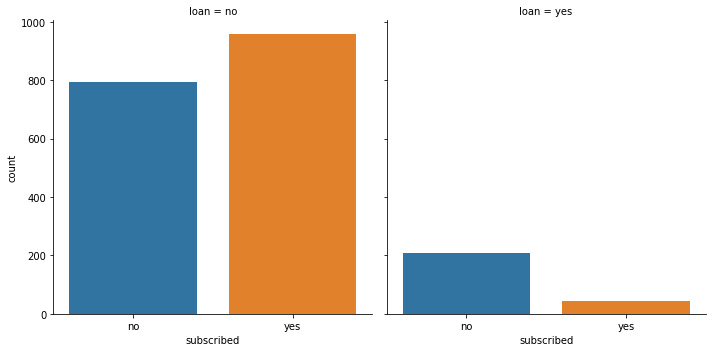

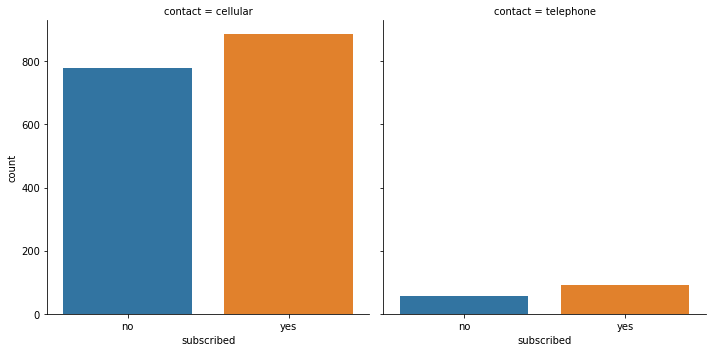

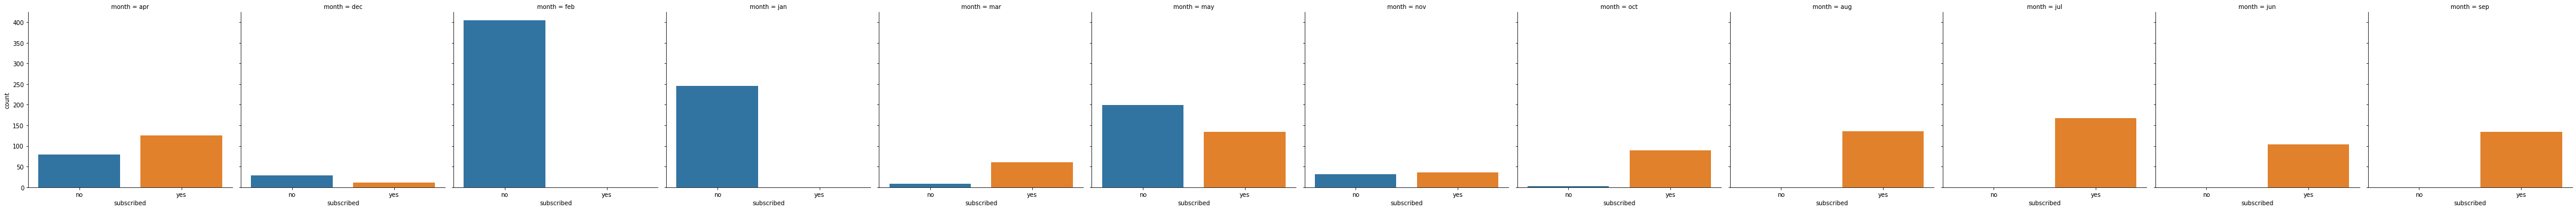

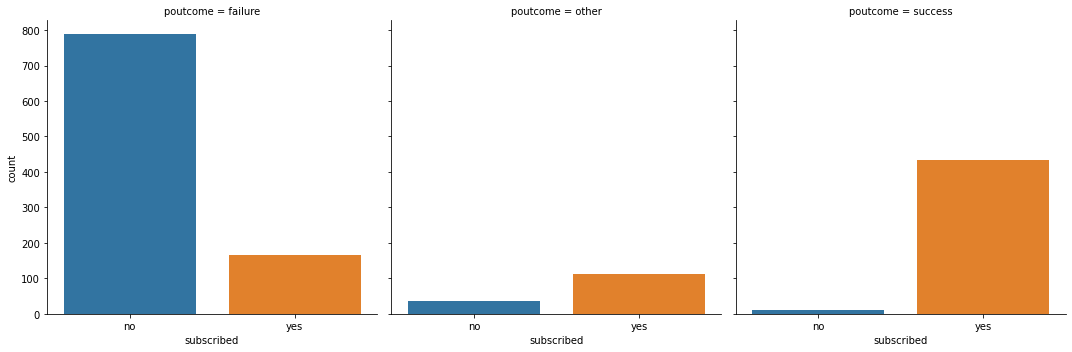

In [112]:

for categorical_feature in categorical_features:
    sns.catplot(x='subscribed', col=categorical_feature, kind='count', data= data)
plt.show()

#### **We can see the certain observation from the graph that** 
##### 1 - Single person's are more likely to subscribe
##### 2 - Person having housing loan and personal loan are less likey to be subscribed
##### 3 - Customer's with cellular phone are more likely to subscribe
##### 4- There's direct relation with poutcome success and subscription -> success = subscription


In [113]:
data.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

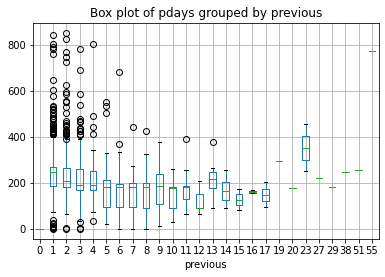

In [114]:
data.boxplot(column='pdays', by='previous')
plt.title('Box plot of pdays grouped by previous')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

##### Between Categorical and numerical

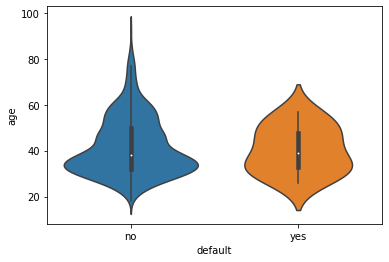

In [115]:
sns.violinplot(data=data, x='default', y='age')
plt.show()

In [116]:
data.nunique()

age             68
job             11
marital          3
education        3
default          2
balance       1274
housing          2
loan             2
contact          2
day             31
month           12
duration       655
campaign        11
pdays          363
previous        26
poutcome         3
subscribed       2
dtype: int64

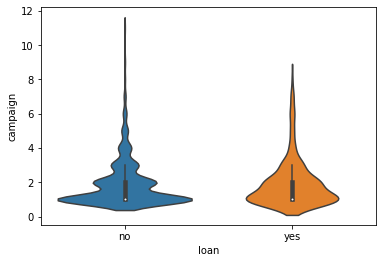

In [117]:
sns.violinplot(data=data, x='loan', y='campaign')
plt.show()

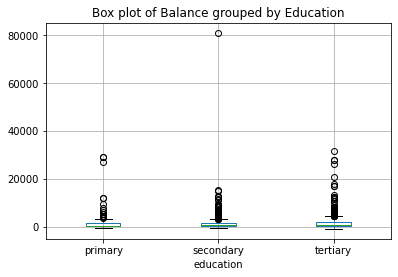

In [118]:
data.boxplot(column='balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") 
plt.show()

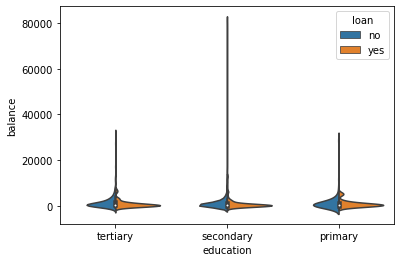

In [119]:
sns.violinplot(data=data, x='education', y='balance', hue='loan', split=True)
plt.show()

#### *The customer with higher studies are more likely to subscribe and will have more balance and will take more loan*

## `Pivot table and frequency`

In [120]:
pivot_table_LC1 = data.pivot_table(values='subscribed',
                                index='loan',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_LC1)

      subscribed
loan            
no      0.546857
yes     0.172000


From the above we can see that 54% of the applicants who have not taken loan will subscribe whereas 17% of the applicants who have taken loan will subscribe.

In [121]:
pivot_table_LC2 = data.pivot_table(values='subscribed',
                                index='education',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_LC2)

           subscribed
education            
primary      0.387097
secondary    0.453266
tertiary     0.578947


From the above we can observe that 38% of applicants having primary education will subscribe and 45% of applicants with secondary and 57% with teritary education will subscribe to the contract term deposit.

In [122]:
pivot_table_LC3 = data.pivot_table(values='subscribed',
                                index='marital',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_LC3)

          subscribed
marital             
divorced    0.437209
married     0.450945
single      0.600890


From the above we can observe that 43% with divorced status, 45% with married, and 60% with single status will subscribe for the term deposit. Meaning that more singles will apply for the term deposit.

In [123]:
pivot_table_LC4 = data.pivot_table(values='subscribed',
                                index='default',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

print(pivot_table_LC4)

         subscribed
default            
no         0.503275
yes        0.066667


We can see that 50% of non-defaulters and 6% of defaulters subscribe to term deposits based on the data above.

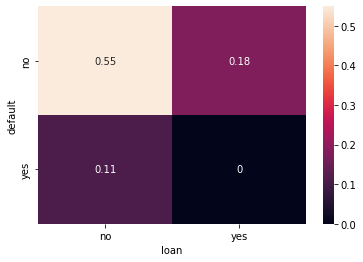

In [124]:
pivot_table_LG = data.pivot_table(values='subscribed', 
                           index='default', 
                           columns='loan',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LG, annot=True)
plt.show()

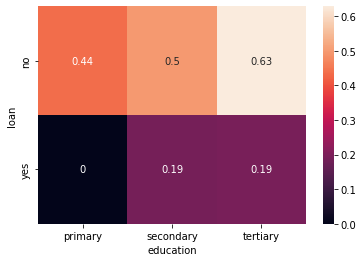

In [125]:
pivot_table_LG2 = data.pivot_table(values='subscribed', 
                           index='loan', 
                           columns='education',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LG2, annot=True)
plt.show()

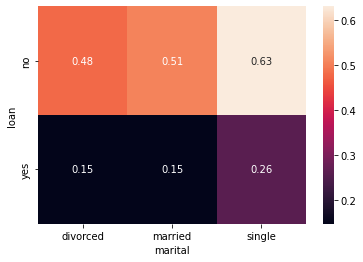

In [126]:
pivot_table_LG3 = data.pivot_table(values='subscribed', 
                           index='loan', 
                           columns='marital',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LG3, annot=True)
plt.show()

# `Conclusion`

Based on the facts and figures presented above, it is possible to conclude that numerical factors such as age and balance, as well as categorical factors such as marital status, loan dependency, and campaign performance, influence a customer's decision to subscribe. A single applicant who does not qualify for a loan, on the other hand, is 63 percent more likely to sign up for a term deposit. A candidate with a tertiary education but no loan is also 63 percent more likely to sign up for a term deposit. 
Other attributes, on the other hand, have no known or hidden meaning and can be ruled out throughout the data preparation process. 
As a result, the bank should pay attention to the aspects that are linked in order to better target the audience and enhance the subscription rate.